# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.metrics import classification_report

from scipy import stats

/home/dirk/anaconda3/envs/8dm50/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [3]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

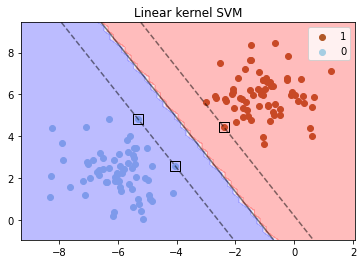

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

In [5]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

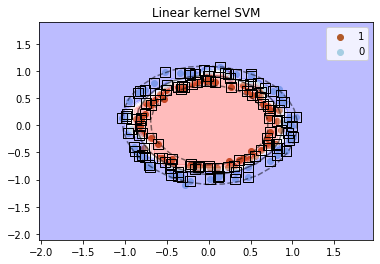

In [6]:
# build the model
model = svm.SVC(kernel='rbf', random_state=33, gamma = 0.5)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

When the data cannot be seperated using a linear function, one should explore other kernels which can split the data samples using a non-linear function. So a RBF kernel should be used when the decision boundaries between the classes are curve-shaped.

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

Yes, because the kernel uses distance. If the distance of 

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.








In [7]:
#---import/prepare dataset
#calculate z-score and threshold z-score < 0 to label 1 (sensitive) and z-score > 0 to label 0 (resistant) 
DR = drug_response.squeeze()
DR_zscore = stats.zscore(DR)

DR_zscore[DR_zscore > 0] = 0
DR_zscore[DR_zscore < 0] = 1

X_train, X_test, y_train, y_test = train_test_split(gene_expression, DR_zscore, random_state=2)


In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC

# Create the pipeline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Create the parameter space
degrees = np.arange(1,5,1)
gammas = np.logspace(-5 -1, 5)
Cs = np.logspace(-2, -1, 5)
Coef0s = np.logspace(0, 4, 5)
model_param_grid = [
    {'svc__kernel': ['rbf'],'svc__gamma': gammas, 'svc__C': Cs},
    {'svc__kernel': ['poly'], 'svc__degree': degrees, 'svc__gamma': gammas, 'svc__C': Cs, 'svc__coef0': Coef0s},
    {'svc__kernel': ['linear'], 'svc__C': Cs},
    {'svc__kernel': ['sigmoid'], 'svc__gamma': gammas, 'svc__C': Cs, 'svc__coef0': Coef0s}
]

# Instantiate GridSearchCV
search = GridSearchCV(
    model,
    model_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='precision',
    verbose=2

)

# and find the best parameters
fitted = search.fit(X_train, y_train)


Fitting 5 folds for each of 6505 candidates, totalling 32525 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 2296 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 4560 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 7480 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 11040 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 14928 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 19456 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 24640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 30136 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 32525 out of 32525 | elapsed:  2.8min finished


In [9]:
print(fitted.best_estimator_)
print(fitted.best_score_)
print(fitted.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, coef0=1000.0, gamma=2.811768697974231e-06,
                     kernel='poly'))])
0.7712131006248654
{'svc__C': 0.01, 'svc__coef0': 1000.0, 'svc__degree': 3, 'svc__gamma': 2.811768697974231e-06, 'svc__kernel': 'poly'}


In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score

# predict
y_pred = fitted.best_estimator_.predict(X_test)

print("Precision is: {0}\n".format(precision_score(y_pred, y_test)))
print("Accuracy is: {0}\n".format(accuracy_score(y_pred, y_test)))

# get classification report
report = classification_report(
    y_test, 
    y_pred
)

print(report)

Precision is: 0.7083333333333334

Accuracy is: 0.6756756756756757

              precision    recall  f1-score   support

         0.0       0.53      0.62      0.57        13
         1.0       0.77      0.71      0.74        24

    accuracy                           0.68        37
   macro avg       0.65      0.66      0.66        37
weighted avg       0.69      0.68      0.68        37



## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 




In [16]:
#---Gridsearch
#parameters

model_param_grid = {#sqrt(num_features)=15.43
    'n_estimators': [10,50,100,300,500,1000],
    'max_depth': [10,20,30,60,100],
    'max_features': [5,15,30,50,100],
    'min_samples_leaf': [2,4,5,10,20],
    'min_samples_split': [5,8,10,15,30],
}
# sqrt(p)=15.43
# only be considered if it leaves at least min_samples_leaf training
# samples in each of the left and right branches. 

#model
model=RandomForestClassifier(verbose=1,bootstrap=True, oob_score=True)#default criterion='gini'


#search
grid_search = GridSearchCV(
        estimator=model,
        param_grid=model_param_grid,
        cv=5,
        scoring='precision', 
        verbose=2,
        n_jobs=-1
)

In [17]:
##fit
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3750 candidates, totalling 18750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

GridSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 60, 100],
                         'max_features': [5, 15, 30, 50, 100],
                         'min_samples_leaf': [2, 4, 5, 10, 20],
                         'min_samples_split': [5, 8, 10, 15, 30],
                         'n_estimators': [10, 50, 100, 300, 500, 1000]},
             scoring='precision', verbose=2)

In [18]:
#---best estimator
print('The Best Parameters:',grid_search.best_params_)

The Best Parameters: {'max_depth': 30, 'max_features': 100, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


In [23]:
#---precision of predictors
from sklearn.metrics import accuracy_score, precision_score

y_pred=grid_search.best_estimator_.predict(X_test)#Call predict on the estimator with the best found parameters.  

#Accuracy    
print("Accuracy on test data: {:.2f}".format(grid_search.best_estimator_.score(X_test, y_test)))
print("Accuracy: {0}\n".format(accuracy_score(y_test, y_pred)))

#Precision
print("Precision: {0}\n".format(precision_score(y_test, y_pred)))

# Classification Report
report = classification_report(
    y_test, 
    y_pred
)
print(report)

#prediction generalisation error
oob_error = 1 - grid_search.best_estimator_.oob_score_
print('Prediction genearlisation error:',oob_error)


Accuracy on test data: 0.59
Accuracy: 0.5945945945945946

Precision: 0.7647058823529411

              precision    recall  f1-score   support

         0.0       0.45      0.69      0.55        13
         1.0       0.76      0.54      0.63        24

    accuracy                           0.59        37
   macro avg       0.61      0.62      0.59        37
weighted avg       0.65      0.59      0.60        37

Prediction genearlisation error: 0.39639639639639634


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


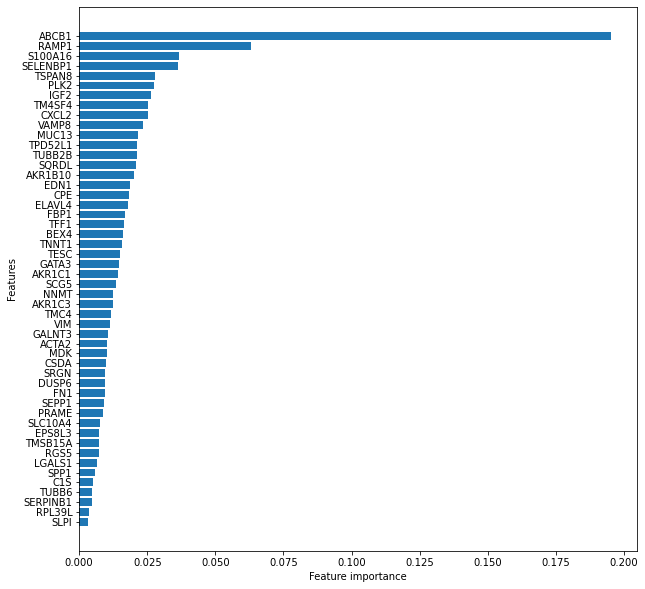

In [24]:
 #---visualise top 50 informative features
import numpy as np
import matplotlib.pyplot as plt
top50=50
importent=grid_search.best_estimator_.feature_importances_
tree_importance_sorted_idx = np.argsort(importent)[::-1]
tree_indices = np.arange(top50) 
plt.figure(figsize=(10, 10))
best50idx=tree_importance_sorted_idx[0:50]
best=importent[best50idx]
names=list(gene_expression.columns[best50idx])
plt.barh(tree_indices,best[::-1])
plt.yticks(tree_indices,names[::-1])
plt.ylabel('Features')
plt.xlabel('Feature importance')
plt.show()      


## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

Study found: ["Structure-based prediction of protein– peptide binding regions using Random Forest"](https://academic.oup.com/bioinformatics/article/34/3/477/4237510)

This study proposes a model for predicting putative protein–peptide-binding residues and binding sites. Since this is challenging to study experimentally due to small peptide sizes, weak binding affinity and peptide flexibility, it is desirable to have reliable computational methods to complement experimental studies. Computational models will be useful to improve efficiency and cost effectiveness of experimental studies. 
Both structural and sequence-based information were integrated by a Random Forest (RF) classifier for prediction of binding residues, which was then employed to infer-binding sites using Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm.
Random Forest is a preferred method because of it's ability to deal with very complex data structures and recognizing the important elements in protein sequences as used in this study.

First of they choose to use SVM, however, by employing all features they found RF has better performance. Thus, the RF model was selected for further study.
The results section shows the improvement by using RF: In the 10-fold CV, SVM model obtained an AUC value of 0.73 which is less than the AUC value of 0.757 achieved by RF. After feature selection for RF model, the AUCs for the 10-fold CV and independent test set increase to 0.775 and 0.782, with an MCC of 0.27 and 0.293, respectively.